In [72]:
#basic libraries
import numpy as np
import pandas as pd

In [93]:
#complex libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix


from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

In [94]:
#importing dataset
codata=pd.read_csv('codata.csv')

In [95]:
#checking distribution of "negatives" in target
from collections import Counter
print(Counter(codata.target=='negative'))

Counter({True: 925290, False: 123285})


In [96]:
codata['target'].unique()

array(['negative', 'other', 'positive'], dtype=object)

In [97]:
codata['target']=codata['target'].replace(to_replace={'positive':1.0,'positive\t':1.0,'negative':0.0,'negative':0.0,'other':np.nan})
codata.rename(columns={'target':'target'},inplace=True)

In [98]:
codata['target'].unique()

array([ 0., nan,  1.])

In [99]:
#duplicating original data
df=codata

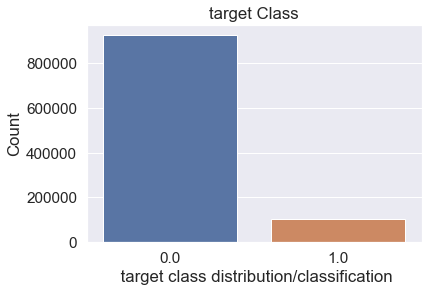

In [100]:
sns.countplot(x='target',data=df)
plt.xlabel(" target class distribution/classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()

In [ ]:
#slimming the data

In [101]:
codata.head()

,id,cough,fever,sore_throat,shortness_of_breath,head_ache,age_above_60,gender,test_indication,target
0,1,0,0,0,0,0,No,male,Other,0.0
1,2,0,1,0,0,0,No,male,Other,0.0
2,3,0,0,0,0,0,Yes,female,Other,0.0
3,4,0,0,0,0,0,No,male,Other,0.0
4,5,0,1,0,0,0,No,male,Contact with confirmed,0.0


In [102]:
codata.shape

(1048575, 10)

In [103]:
codata.dtypes
#codata.info()

id                       int64
cough                    int64
fever                    int64
sore_throat              int64
shortness_of_breath      int64
head_ache                int64
age_above_60            object
gender                  object
test_indication         object
target                 float64
dtype: object

In [ ]:
#encoding categorical variable to numerical 

In [104]:
codata[['cough','sore_throat','shortness_of_breath','head_ache','age_above_60']]=codata[['cough','sore_throat','shortness_of_breath','head_ache','age_above_60']].replace(to_replace={'Yes':1,'No':0})
codata[['gender']] = codata[['gender']].replace(to_replace={'male':1,'female':0,'other':np.nan})
codata[['test_indication']] = codata[['test_indication']].replace(to_replace={'Contact with confirmed':1,'Other':np.nan,'Abroad':1})
iddata=codata.drop('id',axis=1,inplace=True)

In [105]:
codata.dtypes

cough                    int64
fever                    int64
sore_throat              int64
shortness_of_breath      int64
head_ache                int64
age_above_60           float64
gender                 float64
test_indication        float64
target                 float64
dtype: object

In [106]:
codata.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_above_60,gender,test_indication,target
0,0,0,0,0,0,0.0,1.0,NaN,0.0
1,0,1,0,0,0,0.0,1.0,NaN,0.0
2,0,0,0,0,0,1.0,0.0,NaN,0.0
3,0,0,0,0,0,0.0,1.0,NaN,0.0
4,0,1,0,0,0,0.0,1.0,1.0,0.0


In [107]:
codata.isnull().sum()

cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
age_above_60            51865
gender                   2880
test_indication        979690
target                  17851
dtype: int64

In [108]:
codata['age_above_60'].unique()

array([ 0.,  1., nan])

C:\Users\guess\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age_above_60', ylabel='Density'>

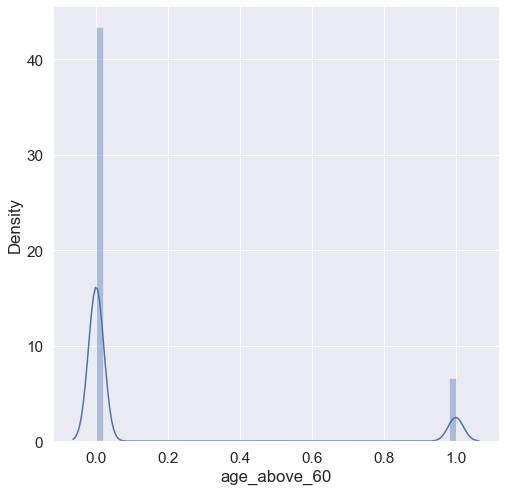

In [109]:
fig,ax=plt.subplots(figsize=(8,8))
sns.distplot(codata.age_above_60)

In [110]:
#replacing nan values by its corresponding median 
codata=codata.fillna(codata.median())

In [111]:
codata.isnull().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
age_above_60           0
gender                 0
test_indication        0
target                 0
dtype: int64

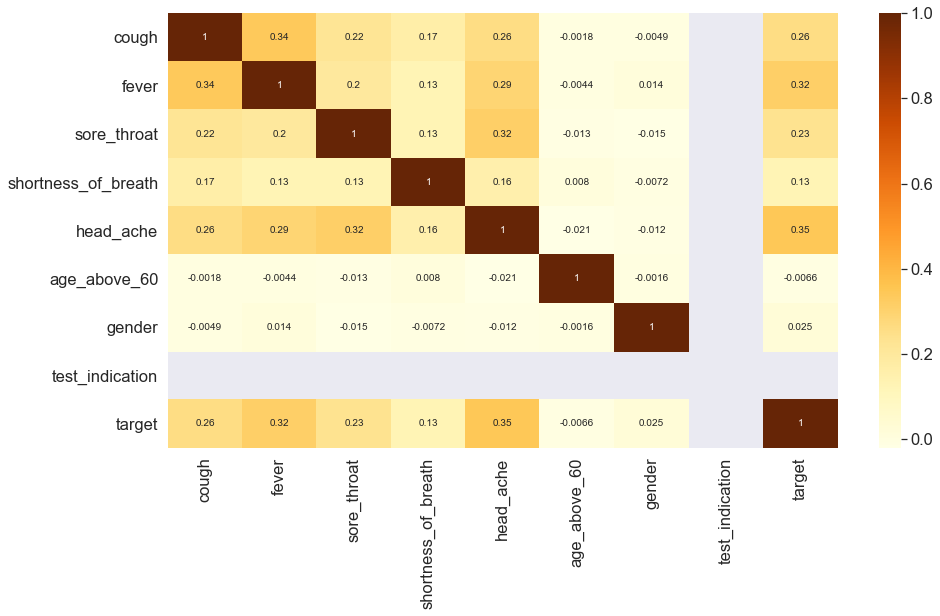

In [112]:
corr = df.corr()
plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
sns.heatmap(corr, annot=True,annot_kws={"size": 10},cmap="YlOrBr")
plt.show()

In [24]:
coviddata['target'].value_counts()

NameError: name 'coviddata' is not defined

In [113]:
codata['target'].value_counts()

0.0    943141
1.0    105434
Name: target, dtype: int64

In [115]:
codata.isnull().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
age_above_60           0
gender                 0
test_indication        0
target                 0
dtype: int64

In [ ]:
#splitting data into train and test

In [116]:
x = codata.iloc[:,:-1]
y = codata.iloc[:,-1]

In [44]:
x

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_above_60,gender,test_indication
0,0,0,0,0,0,0.0,1.0,1.0
1,0,1,0,0,0,0.0,1.0,1.0
2,0,0,0,0,0,1.0,0.0,1.0
3,0,0,0,0,0,0.0,1.0,1.0
4,0,1,0,0,0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
1048570,1,1,0,0,1,1.0,0.0,1.0
1048571,0,0,0,0,0,1.0,1.0,1.0
1048572,0,0,0,0,1,0.0,1.0,1.0
1048573,0,0,0,0,1,0.0,1.0,1.0


In [117]:
y

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1048570    1.0
1048571    1.0
1048572    1.0
1048573    1.0
1048574    1.0
Name: target, Length: 1048575, dtype: float64

In [118]:
codata.isnull().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
age_above_60           0
gender                 0
test_indication        0
target                 0
dtype: int64

In [119]:
codata = codata.dropna(axis=1)

In [120]:
codata

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_above_60,gender,test_indication,target
0,0,0,0,0,0,0.0,1.0,1.0,0.0
1,0,1,0,0,0,0.0,1.0,1.0,0.0
2,0,0,0,0,0,1.0,0.0,1.0,0.0
3,0,0,0,0,0,0.0,1.0,1.0,0.0
4,0,1,0,0,0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1048570,1,1,0,0,1,1.0,0.0,1.0,1.0
1048571,0,0,0,0,0,1.0,1.0,1.0,1.0
1048572,0,0,0,0,1,0.0,1.0,1.0,1.0
1048573,0,0,0,0,1,0.0,1.0,1.0,1.0


In [121]:
codata.shape

(1048575, 9)

In [122]:
codata['target']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1048570    1.0
1048571    1.0
1048572    1.0
1048573    1.0
1048574    1.0
Name: target, Length: 1048575, dtype: float64

In [123]:
print(x.iloc[11])
print("#")
print(y.iloc[11])

print(x.iloc[350],y.iloc[350])

print(x.iloc[1],y.iloc[1])

print(y.iloc[399],y.iloc[399])

cough                  0.0
fever                  0.0
sore_throat            0.0
shortness_of_breath    0.0
head_ache              0.0
age_above_60           0.0
gender                 0.0
test_indication        1.0
Name: 11, dtype: float64
#
0.0
cough                  0.0
fever                  0.0
sore_throat            0.0
shortness_of_breath    0.0
head_ache              0.0
age_above_60           0.0
gender                 1.0
test_indication        1.0
Name: 350, dtype: float64 0.0
cough                  0.0
fever                  1.0
sore_throat            0.0
shortness_of_breath    0.0
head_ache              0.0
age_above_60           0.0
gender                 1.0
test_indication        1.0
Name: 1, dtype: float64 0.0
0.0 0.0


In [41]:
### preprocessing the data

In [42]:
#standardisation of data or Rescaling the data

In [124]:
print(x[11],y[11])

print(x[350],y[350])

print(x[1],y[1])

print(x[107854],y[107854])

KeyError: 11

In [48]:
scaler = StandardScaler()
print(scaler.fit(x))
StandardScaler()
print(scaler.mean_)
print(scaler.transform(x))
print(scaler.transform(x))

StandardScaler()
[0.02696994 0.02735713 0.00909329 0.00275803 0.01908209 0.12618744
 0.48495625 1.        ]
[[-0.16648566 -0.16770984 -0.0957953  ... -0.38001342  1.03055406
   0.        ]
 [-0.16648566  5.96267937 -0.0957953  ... -0.38001342  1.03055406
   0.        ]
 [-0.16648566 -0.16770984 -0.0957953  ...  2.63148602 -0.97035181
   0.        ]
 ...
 [-0.16648566 -0.16770984 -0.0957953  ... -0.38001342  1.03055406
   0.        ]
 [-0.16648566 -0.16770984 -0.0957953  ... -0.38001342  1.03055406
   0.        ]
 [-0.16648566 -0.16770984 -0.0957953  ... -0.38001342 -0.97035181
   0.        ]]
[[-0.16648566 -0.16770984 -0.0957953  ... -0.38001342  1.03055406
   0.        ]
 [-0.16648566  5.96267937 -0.0957953  ... -0.38001342  1.03055406
   0.        ]
 [-0.16648566 -0.16770984 -0.0957953  ...  2.63148602 -0.97035181
   0.        ]
 ...
 [-0.16648566 -0.16770984 -0.0957953  ... -0.38001342  1.03055406
   0.        ]
 [-0.16648566 -0.16770984 -0.0957953  ... -0.38001342  1.03055406
   0.

In [125]:
x = scaler.fit_transform(x)
print(x)

[[-0.16648566 -0.16770984 -0.0957953  ... -0.38001342  1.03055406
   0.        ]
 [-0.16648566  5.96267937 -0.0957953  ... -0.38001342  1.03055406
   0.        ]
 [-0.16648566 -0.16770984 -0.0957953  ...  2.63148602 -0.97035181
   0.        ]
 ...
 [-0.16648566 -0.16770984 -0.0957953  ... -0.38001342  1.03055406
   0.        ]
 [-0.16648566 -0.16770984 -0.0957953  ... -0.38001342  1.03055406
   0.        ]
 [-0.16648566 -0.16770984 -0.0957953  ... -0.38001342 -0.97035181
   0.        ]]


In [29]:
# print('#')
# print(sc.mean_)
# print(sc.var_)
# #dump(sc,'scalar_file.joblib')
# #sclar=load('scalar_file.joblib')

In [126]:
print(x[11],y[11])

print(x[350],y[350])

print(x[1],y[1])

print(x[107854],y[107854])

[-0.16648566 -0.16770984 -0.0957953  -0.05258951 -0.13947508 -0.38001342
 -0.97035181  0.        ] 0.0
[-0.16648566 -0.16770984 -0.0957953  -0.05258951 -0.13947508 -0.38001342
  1.03055406  0.        ] 0.0
[-0.16648566  5.96267937 -0.0957953  -0.05258951 -0.13947508 -0.38001342
  1.03055406  0.        ] 0.0
[-0.16648566 -0.16770984 -0.0957953  -0.05258951 -0.13947508 -0.38001342
 -0.97035181  0.        ] 0.0


In [127]:
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=20, random_state=1, shuffle=True)

In [128]:
X_train , X_test , y_train , y_test   = train_test_split(x,y,test_size = 0.3 , random_state=13)

In [129]:
from imblearn.over_sampling import SMOTE

In [ ]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

 #fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))


In [ ]:
lg = LogisticRegression(random_state = 12)
lg.fit(X_train, y_train)

#predicting the test result and also with input
y_pred_lg = lg.predict(X_test)
scores = cross_val_score(lg, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
from numpy import mean
from numpy import std
#print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [137]:
score_lg = accuracy_score(y_pred_lg,y_test)
score_lg

print("train score - " + str(lg.score(X_train, y_train)))
print("test score - " + str(lg.score(X_test, y_test)))

train score - 0.9154293857509925
test score - 0.9151484711020972


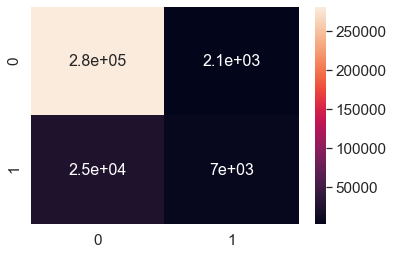

In [57]:
from sklearn.metrics import confusion_matrix
cm_lg = confusion_matrix(y_test,y_pred_lg)
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_lg, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [ ]:
model.predict(data)